<a href="https://colab.research.google.com/github/AzamatZhapalakov/NN/blob/main/lesson_28_Autoencoder_hidden_space.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Reshape, Input

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# стандартизация входных данных
x_train = x_train / 255
x_test = x_test / 255

x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test  = np.reshape(x_test,  (len(x_test),  28, 28, 1))

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
input_img = Input(shape=(28, 28, 1))
x = Flatten()(input_img)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
encoded = Dense(2, activation='linear')(x)

input_enc = Input(shape=(2,))
d = Dense(64, activation='relu')(input_enc)
d = Dense(28*28, activation='sigmoid')(d)
decoded = Reshape((28, 28, 1))(d)

encoder = keras.Model(input_img, encoded, name="encoder")
decoder = keras.Model(input_enc, decoded, name="decoder")
autoencoder = keras.Model(input_img, decoder(encoder(input_img)), name="autoencoder")
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [4]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=64,
                shuffle=True)

Epoch 1/10
938/938 [==============================] - 6s 5ms/step - loss: 0.0594
Epoch 2/10
938/938 [==============================] - 6s 7ms/step - loss: 0.0494
Epoch 3/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0473
Epoch 4/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0460
Epoch 5/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0449
Epoch 6/10
938/938 [==============================] - 6s 6ms/step - loss: 0.0442
Epoch 7/10
938/938 [==============================] - 6s 7ms/step - loss: 0.0436
Epoch 8/10
938/938 [==============================] - 6s 7ms/step - loss: 0.0432
Epoch 9/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0428
Epoch 10/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0425


In [5]:
h = encoder.predict(x_test)

313/313 [==============================] - 1s 2ms/step


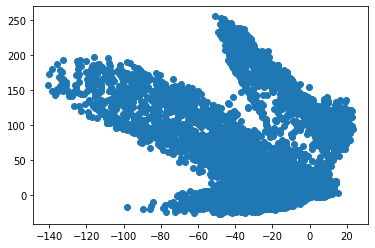

In [20]:
a = plt.scatter(h[:, 0], h[:, 1])

1/1 [==============================] - 0s 24ms/step


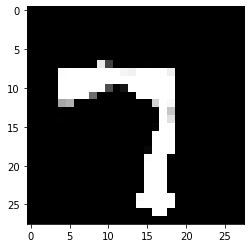

In [19]:
img = decoder.predict(np.expand_dims([-1000, 1000], axis=0))
plt.imshow(img.squeeze(), cmap='gray')